# Conditional neural field latent diffusion (CoNFiLD) model

## Run on HPC

1. submit a task on GPU-based HPC: `sbatch  -p gpu_4090 --gpus=卡数     ./run.sh`
2. submit a job: `python -u /HOME/scw6dou/run/minghan/CoNFiLD/UnconditionalDiffusionTraining_and_Generation/scripts/inference.py /HOME/scw6dou/run/minghan/CoNFiLD/UnconditionalDiffusionTraining_and_Generation/training_recipes/case1.yml`

# NVIDIA GPU Status Report

## System Information
- **NVIDIA-SMI Version**: 550.90.07
- **Driver Version**: 550.90.07
- **CUDA Version**: 12.4

## GPU Utilization Summary

| GPU  | Name                 | Persistence-M | Bus-Id          | Disp.A | Volatile Uncorr. ECC |
|------|----------------------|---------------|-----------------|--------|----------------------|
| 0    | NVIDIA GeForce RTX 4090 | On           | 00000000:01:00.0 | Off    | Off                  |
| 1    | NVIDIA GeForce RTX 4090 | On           | 00000000:23:00.0 | Off    | Off                  |
| 2    | NVIDIA GeForce RTX 4090 | On           | 00000000:41:00.0 | Off    | Off                  |
| 3    | NVIDIA GeForce RTX 4090 | On           | 00000000:61:00.0 | Off    | Off                  |
| 4    | NVIDIA GeForce RTX 4090 | On           | 00000000:E1:00.0 | Off    | Off                  |

## GPU Performance Metrics

| GPU  | Fan  | Temp | Perf | Pwr:Usage/Cap | Memory-Usage | GPU-Util | Compute M. |
|------|------|------|------|---------------|--------------|----------|------------|
| 0    | 35%  | 37C  | P2   | 58W / 450W    | 867MiB / 24564MiB | 11%      | Default    |
| 1    | 36%  | 36C  | P8   | 17W / 450W    | 4MiB / 24564MiB   | 0%       | Default    |
| 2    | 36%  | 37C  | P8   | 17W / 450W    | 4MiB / 24564MiB   | 0%       | Default    |
| 3    | 36%  | 35C  | P8   | 21W / 450W    | 4MiB / 24564MiB   | 0%       | Default    |
| 4    | 36%  | 34C  | P8   | 29W / 450W    | 4MiB / 24564MiB   | 0%       | Default    |

## Processes Utilizing GPU

| GPU  | GI  | CI  | PID  | Type | Process Name | GPU Memory Usage |
|------|-----|-----|------|------|--------------|------------------|
| 0    | N/A | N/A | 4747 | C    | python       | 860MiB           |

**GPU 0 (RTX 4090) is being used for inference.**

- Only 867MB out of 24.5GB is used → Not an out-of-memory (OOM) issue.
- Your script (PID 4747, python) is using 860MB of VRAM.
- Other GPUs (1-4) are almost empty (4MB usage).

## CoNFiLD airchitecture

1. It utilizes **generaltive AI techineques** to learn the **underlying probability distribution** $p(\phi(\mathbf{x},t))$ fo the spatiotemporal turbulent flow fields $\mathbf{\phi}(\mathbf{x},t)$ from **instantaneous flow datasets** $\mathbf{\phi}(\mathbf{x}, t) \in \texttt{A}_{train}$. 
2. It leverages neural implicit representations to facilitate efficient and scalable diffusion-based generation within **a compact latent space**. 
3. It has a unique combination of Conditional Neural Field (CNF) and Latent Diffusion Models (LDM), which avoids direct application of diffusion process in the high-dimensional physical domain. This requires huge amount of computational resoures and memory constraints. 
4. one-shot approach: A "one shot approach" refers to a method where a system or model learns to perform a task based on only a single example or piece of data, meaning it needs **minimal training data** to make accurate predictions, often used in machine learning scenarios where acquiring large datasets is difficult;
5. Highlighting the underlying distribution of the training dataset instead of merely replicating the labeled data.



## Inputs to `load_elbow_flow` `case1.yml`

$\underline{\textbf{Data paths & Loading}}$
```
data_path: /HOME/scw6dou/run/minghan/CoNFiLD/data/Case1/data.npy
```
- Path to the main dataset file (`.npy` format, likely a `NumPy` array) for Case 1. This file contains the flow field data used for `training/testing`.

```
load_data_fn: load_elbow_flow
```

- The function used to load the dataset. 

- `load_elbow_flow` Suggests it is specifically for flow simulations in an "elbow" (e.g., curved pipe flow).

```
coor_path: /HOME/scw6dou/run/minghan/CoNFiLD/data/Case1/coords.npy
```

- Path to a `NumPy` file containing spatial coordinates of the dataset (e.g., `x, y, z` locations of grid points).
- Used for reconstructing spatially resolved fields.


$\underline{\textbf{Saving & Checkpointing}}$

```
save_path: /HOME/scw6dou/run/minghan/CoNFiLD/save/t0
```
- Directory where trained models, logs, and outputs will be saved.
- `save_every: 5`: The model will be saved every 5 epochs


$\underline{\textbf{Data Processing & Normalization}}$


```
lumped_latent: True 
```
- Suggests that the latent representation of the data is "lumped" into a lower-dimensional format.  
- This can reduce memory requirements and improve training efficiency.

```
normalizer:
    method: '-11'
    dim: 0
```
- `method: -11` Specifies the normalization method.
- `-11` might mean Min-Max normalization, scaling values between -1 and 1.

- `dim:0`: Normalization is applied along dimension 0 (likely the time axis).

$\underline{\textbf{Batching & Computational Setup}}$

```
batch_size: 64
```

- Number of training samples per batch

```
test_batch_size
```
- Number of test samples per batch (large since testing doesn't require backpropagation)

```
multiGPU:1
```
- Whether multiple GPUs are used (1 means enabled)

```
readin_data_shape: "t N c"
```

- The expected shape of input data: `t:` time steps; `N:` number of spatial points; `c:` number of flow variables (e.g., velocity components)
- batch shape of data batches, same as `readin_data_shape`.

```
batch_shape: "t N c"
```
- The shape of data batches, same as `readin_data_shape`.

$\underline{\textbf{Training Parameters}}$

```
hidden_size: 128
```

- The number of hidden units in the neural network layers

```
epochs: 100
```

- The total number of training epochs

```
loss_fn:MSELoss
```

- The loss function used: Mean Squared Error (MSE), which penalizes large deviation from the ground truth.

```
test_criteria:rMAE
```

- Metric used to evaluate test performance: Relative Mean Absolute Error (rMAE)


$\underline{\textbf{Neural Flow (NF) Model Settings}}$

```
NF:
  name: SIRENAutodecoder_film
  num_hidden_layers: 10
  out_features: 3
  hidden_features: 128
```

- Specifies the architecture for the Neural Field model.
- name: SIRENAutodecoder_film
    - The model type.
    - "SIREN" (Sinusoidal Representation Networks) suggests using `sin activation functions`, which help represent high-frequency details.
    - "Autodecoder" indicates that it learns a compressed representation (latent space)
    - "FiLM" (Feature-wise Linear Modulation) suggests adaptive feature scaling/modulation.
- `num_hidden layers:10`
    - The number of hidden layers in the neural network.

- `out_features: 3`
    - The number of output features, likely representing three velocity components (`Ux, Uy, Uz`).
    
- `hidden_features: 128`
    - The number of hidden units per layer.

$\underline{\textbf{Learning Rates}}$

```
lr:
  nf: 1.e-4
  latents: 1.e-5
```

- `lr`:
    - learning rate settings for different components
    - `nf:1.e-4`
        - Learning rate for the Neural Field model (SIREN-based network).
        - Lower values stabilize training and prevent divergence.

- `latents:1.e-5`
    - Learning rate for latent space representations (used for encoding flow features).
    - Smaller than `nf`, likely because latent updates need to be more stable.

$\underline{\textbf{Dimensionality}}$

```
dims: 2
```
    - Specifies that the model is working in 2D flow fields.

$\underline{\textbf{Summary}}$

The model is learning spatiotemporal flow fields from DNS or experimental data.

- It uses Neural Fields (SIREN-based) to reconstruct the flow over time.
- Data is normalized, batched, and processed in time-space format (t N c).
- The model learns a latent representation and uses adaptive learning rates for stability.
- Outputs include velocity components (Ux, Uy, Uz) over an extended time horizon.




## Unconditional training is the foundation

$\underline{\textbf{What type of noise should be added for initiation}}$

Any **random Gaussian noise** sampled from a **zero-mean, unit-variance distribution** can serve as the input to initiate the inference process!

The Unconditional Diffusion Model serve as the **foundation** for the conditional model. 
- The unconditional diffusion model is trained by gradually adding Gaussian noise to the original high-fidelity DNS data, e.g., noise is generated through: `noiser = get_noise(sigma=0.0, name='gaussian')`.
- In **inference (generation)**, you **start with pure Gaussian noise** and **denoise** it step by step to reconstruct realistic flow fields.
- The model learns to map random noise into physically realistic flow structures, capturing the turbulence statistics.

$\underline{\textbf{Unconditional model precede the conditional model}}$

In most cases, the **unconditional diffusion model** serves as the **foundation** for the conditional model.
- The The unconditional model first learns to generate realistic turbulence fields from noise (training without specific conditions).
- The conditional model builds on the unconditional one by incorporating additional constraints (e.g., sparse velocity/pressure measurements, low-resolution data, boundary conditions).
- Due to spatial correlations in turbulence, information from sensors propagates through the domain via the generative model’s learned structures, which **forces the randomness in the unprobed/unobserved regions to match the DNS data**. 
- Conditional generation leads to inference of both **stochasticity with similar randomness to DNS (similar instantaneous fields)** and **statistics (mean, standard deviation)** closer to DNS. 
- Unconditional generation only ensures good agreement with DNS in terms of statistics.

$\underline{\textbf{Inference in Unconditional and Conditional generation}}$

| **Model Type**               | **Inner Inference Step: What Input Is Given?**                                              | **Inference Step: What Happens?**                                       |
|--------------------------|----------------------------------------------------------------------|----------------------------------------------------------------|
| **Unconditional Model**              | Random Gaussian noise           | The model **denoises the noise**, reconstructing a realistic high-fidelity flow field    |
| **Conditional Model**        | Conditions (e.g., sparse measurements, low-resolution data, partial flow field)                | The model **constrains denoising** so that the general flow field satisfies the given conditions. |


### Unconditional generation for two dimensional irregular pipe flow with stochastic forcing
1. 2D
2. stochastic forcing 
$$\mathbf{f} = \begin{bmatrix} f_x(\mathbf{x}, t), f_y(\mathbf{x}, t) \end{bmatrix}^T
    \label{eq:placeholder}$$, with each component sampled from a standard normal distribution
3. unstructured flow data with irregular geometries
4. $$\frac{\partial f}{\partial t} = \nu_f \nabla^2 f + \delta$$
5. A long-span spatiotemporal flow sequence ($\phi^{dns}$) consisting of 16000 instantaneous flow fields $u, v, p$
6. $N_{t} = 128$ snapshots: Given 16000 instantaneous flow fields, Instead of treating the entire dataset as one long sequence, it is split into 15,873 shorter subsequences ($\phi_{i}$). Each shorter subsequence contains $N_t = 128$ snapshots. If you start at the first snapshot and extract a sequence of 128 snapshots, you get one subsequence. Then, shifting forward by one snapshot and taking another sequence of 128, you generate another subsequence. This process is repeated in a sliding window manner across the full dataset. Thus, if you take 16,000 total snapshots and extract overlapping sequences of 128 snapshots, you obtain:

15,873 = 16,000 - 128 + 1

This confirms that the subsequences are overlapping and extracted using a one-step sliding window.

It means that instead of analyzing all 16,000 snapshots as one unit, the dataset is divided into overlapping chunks of 128 snapshots each, leading to a total of 15,873 subsequences. These smaller segments allow for more manageable analysis, potentially improving training stability in machine learning applications or enabling localized flow structure analysis.

6. $\textbf{Results:}$ mean velocity compared to DNS and standard deviation for the generated samples vs DNS
7. $80\%$ of each subsequence is used for training and remaining data is used for testing.

### Unconditional generation for equilibrium inflow turbulence of 3D channel flows


### Unconditional generation for non-equilibrium turbulence of periodic hill

Placing limited number of flow sensors sparsely within the flow field to collect velocities at different times. These measurements serve as $\textbf{conditional inputs.}$.

1. statistically two-dimensional (streamwise and wall-normal)
2. 
- Placing limited number of flow sensors sparsely within the flow field simulated by DNS to collect velocity signals at different times. 
- 25 CoFiLD generated PDF of both velocity and pressure vs DNS

For the periodic hill case:

1. randomly placed 10 and 100 sensors, which corresponds to $0.1\%$ and $0.17\%$ of the grid points in each case. These sensors are used to construct the full-field spatio-temporal flows.
2. performance is assessed by comparing the reconstructed flows to the ground truth.
3. ground truth:$N_t = 256$ snapshots, equivalent to 768000 numerical steps. 

Unlike unconditional generation, the reconstructed flows, despite being one of many realizations generated by CoNFiLD, show **notable similarities** to the **ground truth** in both contour maps and sensor signal patterns, owing to the inclusion of conditional information (i.e., sensor measurements). 


### Conditional generation: flow reconstruction from sparse sensor measurements


1. sensor-based flow reconstruction
2. flow data restoration
3. super-resolved generation
4. Bayesian posterior sampling

机器学习：1. 提升准确度，2 预测未知情况，3.预测未来第一：用 unconditional diffusion model 预测 nonequilibrium flow: 1. Transitional flow for averaged flow field 2. Turbine wakes 2. Use conditional diffusion model to predict full-field spatiotemporal flow field for them 3. Help predict into the future flow states with more sensor measurements and improved model capabilities using conditional diffusion model. This project focuses on combining uncertainty quantification Kalman filter into diffusion models to reconstruct spatiotemporal flow super-resolution flow fields. I had solid experience in uncertainty quantification. Also transitional flows modeling. The project focuses on reconstructing the transitional flow fields without running costly LES simulations. The estimation of uncertainty due to boundary conditions will be conducted by conditional generation. Using conditional diffusion generation, it avoids costly high-fidelity simulations to merely map to labeled data like traditional DNN method. It only gives deterministic averaged flow solutions without incorporating the chaotic nature by capturing the instantaneous flow fields. Or it avoids truly data assimilation method like Kalman filter method: even though it can be used to instantaneously update predictions towards the truth by assimilating available high-fidelity data, costly high-fidelity simulations must be run together with the data assimilation framework. This project focuses on generating the instantaneous flow fields without running high-fidelity simulations. It can be conditioned on stochastic initial and boundary conditions to construct the uncertainty bound. In addition, the focus will be on transitional flows and wakes that feature the instability,  which are going to be fIn addition, it learns statistical distribution to produce statistical distributions to produce instantaneous flow fields. Standard deviation is the key of uncertainty associated with the generated samples. (I have gained the fundamental experience in using Kalman filter method to assimilate the heat flux at one boundary of the rod.)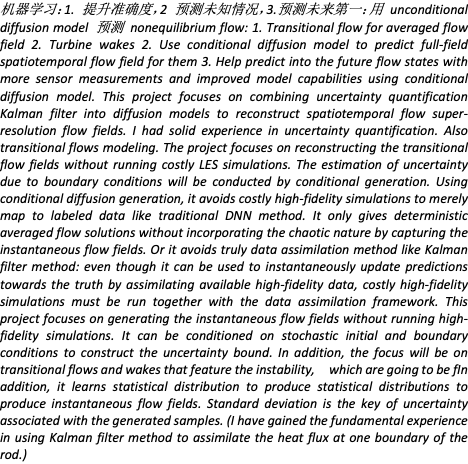

## Later fill the content by searching "What are the applications in practice regarding each goal?" in the apply funding chatgpt

## find how predictions which are randomly chosen through `train_probes = rng.choice(gen_fields.shape[2], size=no_of_sensors, replace=False)` match the corresponding sensor data

## Plot contours using provided data

## figure out if replacing sensor coordinates with full field coordinates can be used to remove conditional sensor generation